**CLT (Thm 10.9):**

As $n \to \infty$:
\begin{align*}
\sqrt{n}(\widehat{\theta} - \theta_0) \xrightarrow{d} \mathcal{N}(0, \mathcal{H}_\theta^{-1}),
\end{align*}

where $\mathcal{H}_\theta$ is the Fisher information matrix evaluated at $\theta_0$.

**Delta Method (Thm 8.8):**

As $n \to \infty$:
\begin{align*}
\sqrt{n} \left( f(RT_t \mid \widehat{\theta}) - f(RT_t \mid \theta_0) \right)
\xrightarrow{d}
\mathcal{N}\left( 0, \nabla_\theta f^\top \mathcal{H}_\theta^{-1} \nabla_\theta f \right),
\end{align*}

where $\nabla_\theta f$ is the gradient of $f(RT_t \mid \theta)$ with respect to $\theta$, evaluated at $\theta_0$.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from autograd import jacobian

from drift_diffusion.model import DriftDiffusionModel, pdf
from drift_diffusion.sim import sample_from_pdf

params = dict(a=0.82, t0=0, v=1.24 * 0.3, z=0)
y = sample_from_pdf(**params, n_samples=1000, random_state=0)
y_range = np.linspace(y.min(), y.max(), len(y))
X = pd.DataFrame(np.ones(len(y)))

ddm = DriftDiffusionModel(t0=0, z=0, cov_estimator="sample-hessian")
ddm.fit(X, y)
ddm.params_

array([0.82378228, 0.34172915])

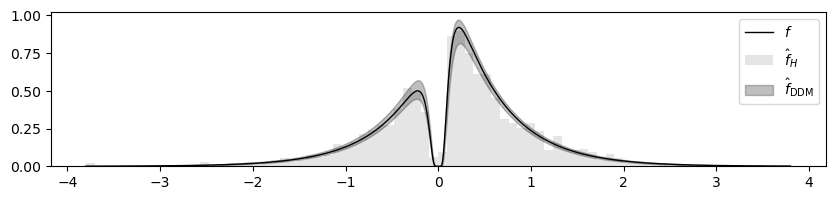

In [2]:
f = pdf(y_range, **params)
f_ddm_ = ddm.pdf(X, y_range, alpha=0.01)

fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(y_range, f, c="k", lw=1, label=r"$f$")
ax.hist(y, bins=80, density=True, color="k", alpha=0.1, label=r"$\hat{f}_H$")
ax.fill_between(y_range, f_ddm_[0], f_ddm_[1], alpha=0.25, color="k", label=r"$\hat{f}_\text{DDM}$")
ax.legend()